En primer lugar vamos a importar tensorflow y vamos a comprobar su versión

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


Ahora, vamos a importar keras y numpy

In [ ]:
from tensorflow import keras
import numpy as np

**Construcción de una clasificador de imagenes utilizando una API secuencial**

vamos a cargar ahora uno de los dataset de entrenamiento de keras, el reconocimiento de los digitos

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Vamos a ver el tamaño del dataset, y el tamaño de la imagen

In [ ]:
X_train_full.shape

(60000, 28, 28)

Aqui comprobamos el tipo de dato

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
np.set_printoptions(linewidth=200)
print(X_train_full[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

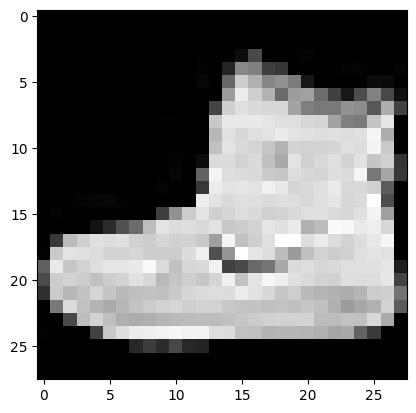

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train_full[0], cmap='gray')

Rescalado de datos, de 0 a 1

In [ ]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Le damos un nombre a cada una de las clases

In [ ]:
y_train_full[0]

9

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

**Creación del modelo usando una API secuencial**

In [ ]:
model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

otra forma de hacer esta misma operación de añadir capas:


In [ ]:
# model= keras.models.Sequential([]
#    keras.layers.Flatten(input_shape=[28,28])
#    keras.layers.Dense(300, activation="relu")
#    keras.layers.Dense(300, activation="relu")
#    keras.layers.Dense(10, activation="softmax")
#])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 300)               90300     
                                                                 
 dense_5 (Dense)             (None, 10)                3010      
                                                                 
Total params: 328810 (1.25 MB)
Trainable params: 328810 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Vamos ahora a ver las capas

In [ ]:
model.layers

algunas operaciones y comando interesantes

In [ ]:
hidden1=model.layers[1]
hidden1.name

'dense_3'

Todos los parametros de una capa estan accesibles utilizando "get_weights()" y "set_weights()"

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.04722939, -0.03846778, -0.03980218, ..., -0.0532432 , -0.07057525,  0.00306943],
       [-0.0317075 ,  0.06796603,  0.05585504, ..., -0.0487368 ,  0.03203128,  0.07436429],
       [-0.03886316,  0.00941908,  0.01296501, ..., -0.02126882,  0.04403529,  0.02414234],
       ...,
       [ 0.04856745,  0.02597047, -0.02753534, ..., -0.04107516, -0.06934146, -0.00409312],
       [ 0.00311136,  0.00258957, -0.06866039, ..., -0.04701762,  0.03956278,  0.01855619],
       [ 0.06548211, -0.04534287,  0.03854463, ...,  0.01435592,  0.01060731, -0.05726008]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

In [ ]:
biases.shape

(300,)

**Compilando el modelo**

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics =["accuracy"])


**Entrenando y evaluando el modelo**

In [ ]:
history = model.fit(X_train,y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 18s 10ms/step - loss: 0.7217 - accuracy: 0.7676 - val_loss: 0.5012 - val_accuracy: 0.8338
Epoch 2/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4857 - accuracy: 0.8314 - val_loss: 0.4762 - val_accuracy: 0.8310
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4418 - accuracy: 0.8451 - val_loss: 0.4149 - val_accuracy: 0.8594
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4135 - accuracy: 0.8540 - val_loss: 0.3934 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3941 - accuracy: 0.8624 - val_loss: 0.3891 - val_accuracy: 0.8636
Epoch 6/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.3779 - accuracy: 0.8650 - val_loss: 0.3708 - val_accuracy: 0.8744
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3651 - accuracy: 0.8708 - val_loss: 0.3674 - val_acc

Ahora vamos a comprobar las variables loss, accuracy, validation_loss y validation_accuracy

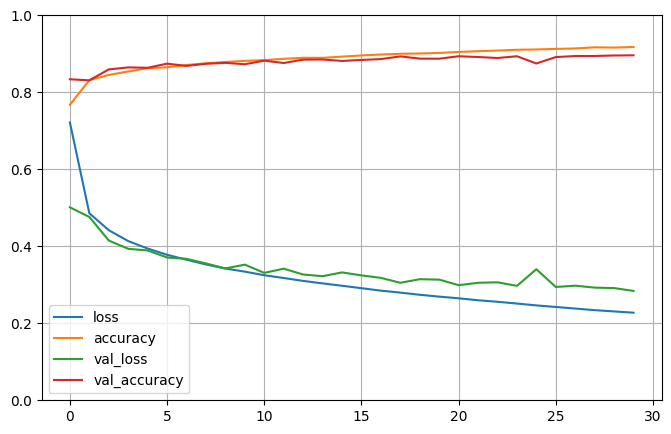

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Las curvas training accuracy y validation accuracy  se van incrementando durante el entrenamiento, mientras que las loss se hacen mas pequeñas

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 65.6220 - accuracy: 0.8449


[65.6220474243164, 0.8449000120162964]